In [104]:
import cv2

In [105]:
import matplotlib.pyplot as plt

In [3]:
# read an image in 

In [106]:
img_path = r"C:\Users\vedpi\Downloads\T0002_XM_20110801160224_01.jpg"

In [107]:
ground_truth_image = plt.imread(img_path)

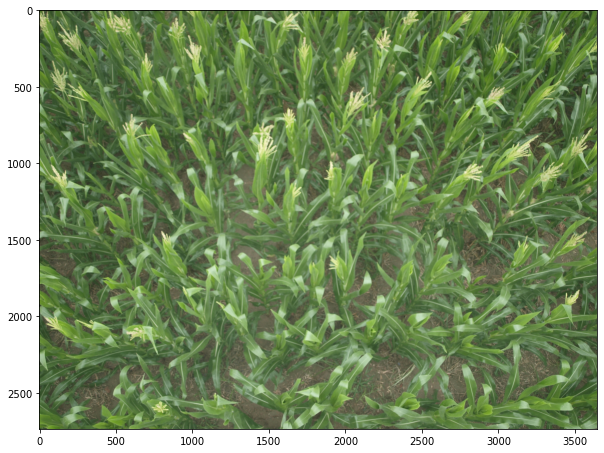

In [109]:
plt.figure(figsize = (10,10))
plt.imshow(ground_truth_image)
plt.show()

In [110]:
ground_truth_image.shape

(2736, 3648, 3)

In [112]:
heatmap_path = r"C:\Users\vedpi\Downloads\T0002_XM_20110801160224_01.csv"

In [113]:
import pandas as pd

In [114]:
# read the heatmap in 
heatmap = pd.read_csv(heatmap_path, index_col = False).iloc[:,1:]

In [115]:
heatmap.shape

(342, 456)

In [116]:
from skimage.transform import resize

In [117]:
ground_truth_image_reshaped = resize(ground_truth_image, (ground_truth_image.shape[0] // 8,
                                                                   ground_truth_image.shape[1] // 8),
                       anti_aliasing=True)

In [118]:
ground_truth_image_reshaped.shape

(342, 456, 3)

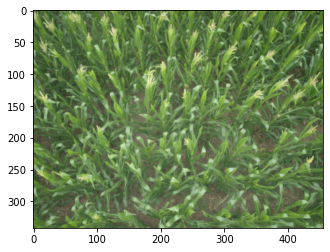

In [119]:
plt.imshow(ground_truth_image_reshaped)
plt.show()

In [120]:
import matplotlib.cm as cm

In [121]:
import numpy as np

In [122]:
heatmap /= np.max(heatmap)

In [123]:
heatmap = np.uint8(255 * heatmap)

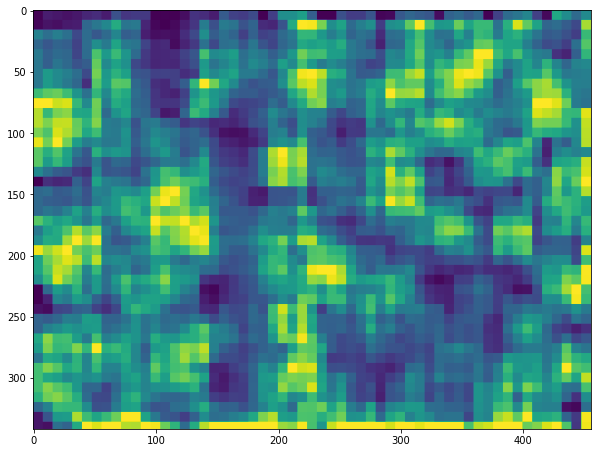

In [124]:
plt.figure(figsize = (10,10))
plt.imshow(heatmap)
plt.show()

In [125]:
jet = cm.get_cmap("jet") 
jet_colors = jet(np.arange(256))[:, :3] 
jet_heatmap = jet_colors[heatmap] 

In [126]:
import tensorflow as tf

In [127]:
jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap) 

In [128]:
jet_heatmap.shape

(342, 456, 3)

In [129]:
img = tf.keras.preprocessing.image.img_to_array(ground_truth_image_reshaped) 

In [212]:
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

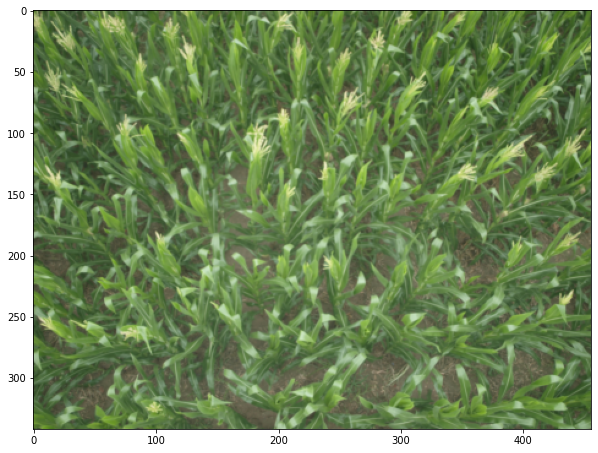

In [213]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

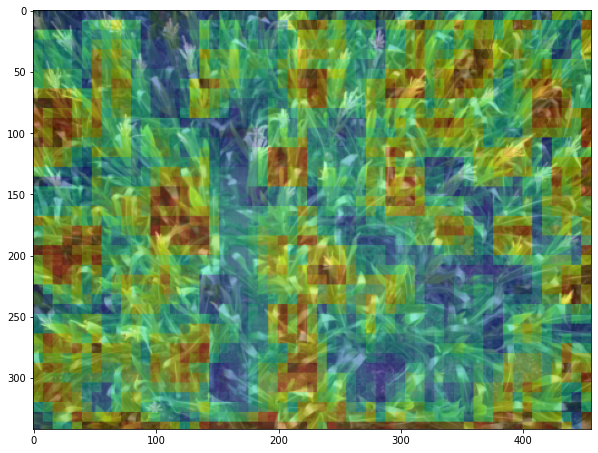

In [214]:
plt.figure(figsize = (10,10))
plt.imshow(superimposed_img)
plt.show()

In [215]:
superimposed_img_array = tf.keras.preprocessing.image.img_to_array(superimposed_img)

In [216]:
superimposed_img_array = np.uint8(superimposed_img_array)

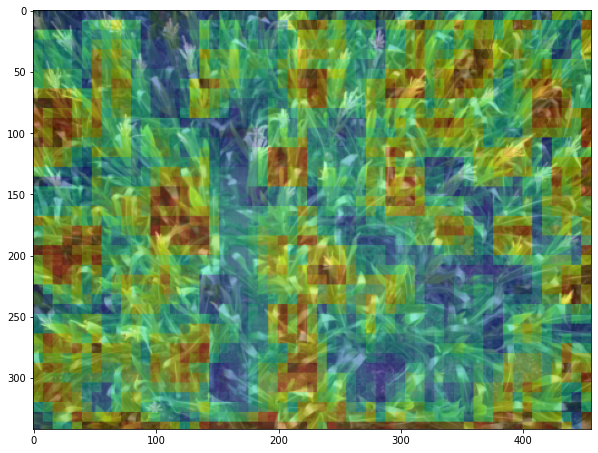

In [217]:
plt.figure(figsize = (10,10))
plt.imshow(superimposed_img_array)
plt.show()

In [218]:
import scipy.io

In [219]:
# get the corresponding mat file

mat_file = r"C:\Users\vedpi\Downloads\T0002_XM_20110801160224_01.mat"

# load the mat file
loaded_mat = scipy.io.loadmat(mat_file)

# extract the coordinates
coords_extracted = loaded_mat['annotation'][0][0][1]

# convert this to a list
coords_extracted = coords_extracted.tolist()

In [220]:
# divide the coordinates by 8

resized_coords = []
for coords in coords_extracted:
    h = coords[0]//8
    w = coords[1]//8
    resized_coords.append((h,w))

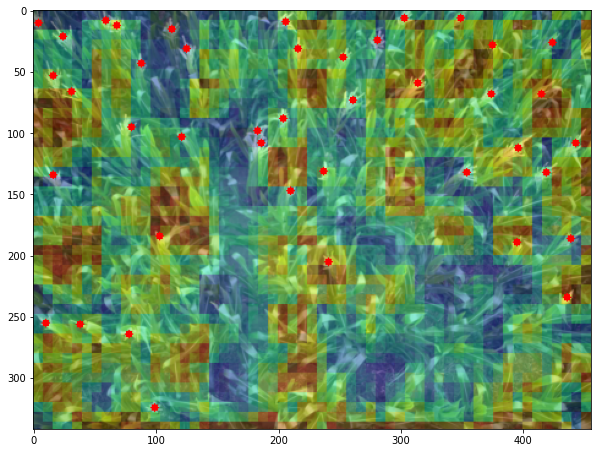

In [221]:
for points in resized_coords:
    image_annotated = cv2.circle(superimposed_img_array, (points[0],points[1]), radius = 3, color = (255,0,0), thickness = -1)
    
plt.figure(figsize = (10,10))
plt.imshow(image_annotated)
plt.show()